In [196]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

# Set defaults for charts so they aren't so tiny!
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10,5]

import numpy
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from pprint import pprint
import math
import pandas as pd
import csv
import sklearn.covariance
import scipy.optimize
import sklearn.linear_model
import scipy.stats

In [285]:
with open('n_ei_candidates_results.csv', 'rt') as file:
    reader = csv.DictReader(file)
    results = list([dict(item) for item in reader])
    
results = [{key:(float(item) if '.' in item else item) for key,item in result.items()} for result in results]
for result in results:
    result['stdvsmedian'] = result['std'] / result['median']
    result['stdvsmin'] = result['std'] / result['min']

    
nonFeatureKeys=['gamma', 'loss', 'min', 'median', 'max', 'best', 'bestSize', 'predicted']
lossKeys = ['n_ei_candidates_2', 
            'n_ei_candidates_4',
            'n_ei_candidates_6',
            'n_ei_candidates_12',
            'n_ei_candidates_18',
            'n_ei_candidates_24', 
            'n_ei_candidates_30',
            'n_ei_candidates_36',
            'n_ei_candidates_42',
            'n_ei_candidates_48']

for result in results:
    best = min(lossKeys, key=lambda key: result[key])
    result['best'] = best
    result['bestSize'] = int(best[len('n_ei_candidates_'):])
    
    
features = [{key:value for key,value in result.items() if key not in nonFeatureKeys} for result in results]
pd.DataFrame(features)

,best/median,contributions_exponential,contributions_linear,contributions_logarithmic,contributions_peakvalley,contributions_random,interactions,interactions_index,interactions_linear,interactions_peakvalley,...,n_ei_candidates_4,n_ei_candidates_42,n_ei_candidates_48,n_ei_candidates_6,num_parameters,range,skew,std,stdvsmedian,stdvsmin
0,0.749145,0,0.375,0.25,0.25,0.125,13,0.677083,0.307692,0.153846,...,0.218354,0.213535,0.214659,0.213106,8,0.366602,1.151739,0.065687,0.231431,0.308996
1,0.860804,0.142857,0.142857,0.142857,0.142857,0.428571,53,0.901361,0.169811,0.283019,...,0.281927,0.288089,0.287372,0.275710,14,0.376323,1.169056,0.035390,0.107273,0.124573
2,0.850882,0.333333,0.333333,0.333333,0,0,3,1.11111,0,0.666667,...,0.107252,0.107408,0.107290,0.107949,3,0.293868,3.073812,0.065144,0.516890,0.608692
3,0.733154,0.142857,0.428571,0.142857,0.142857,0.142857,13,0.884354,0.230769,0.307692,...,0.158173,0.169098,0.170638,0.164833,7,0.358065,1.609302,0.080929,0.360590,0.492500
4,0.601273,0,0,0.666667,0,0.333333,2,0.740741,0,0,...,0.074465,0.070853,0.071204,0.071605,3,0.319432,2.242282,0.094326,0.764848,1.276085
5,0.877172,0.25,0.375,0.25,0,0.125,17,0.885417,0.117647,0.294118,...,0.310440,0.314035,0.314925,0.309138,8,0.460912,1.694632,0.054045,0.148918,0.169885
6,0.786922,0,0.25,0,0.25,0.5,7,1.45833,0,0.142857,...,0.221287,0.220666,0.220943,0.219016,4,0.385406,1.512119,0.061513,0.220970,0.281035
7,0.891978,0.214286,0.214286,0.214286,0.142857,0.214286,66,1.12245,0.242424,0.212121,...,0.268070,0.278494,0.281272,0.272998,14,0.357841,1.416328,0.030810,0.098798,0.110765
8,0.853347,0.166667,0.25,0.25,0.333333,0,52,1.2037,0.25,0.230769,...,0.247675,0.255335,0.259758,0.255140,12,0.362104,1.543033,0.043704,0.147515,0.172916
9,0.862149,0.133333,0.333333,0.133333,0.0666667,0.333333,58,0.859259,0.258621,0.206897,...,0.242128,0.250666,0.249790,0.243649,15,0.340149,1.426506,0.035899,0.124037,0.143984


<IPython.core.display.Javascript object>


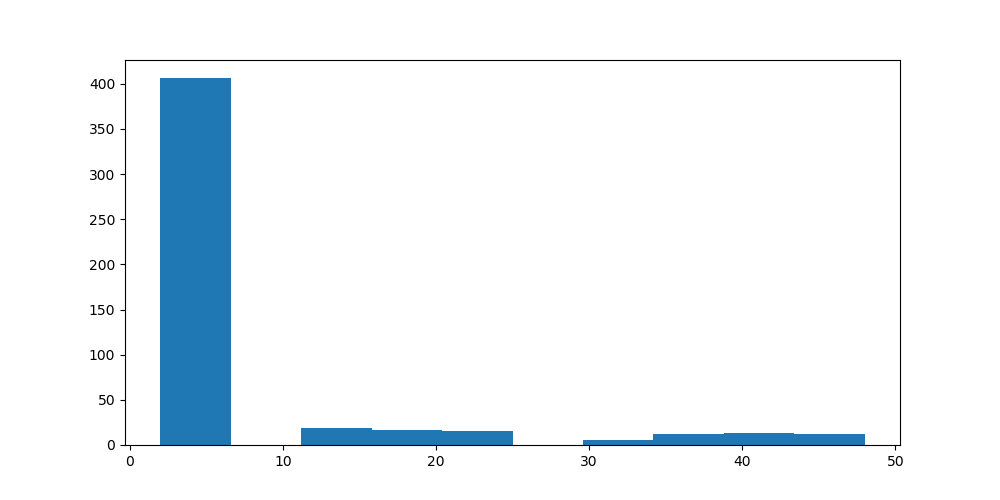

In [289]:
sizes = [result['bestSize'] for result in results]

averageSize = numpy.max(sizes)

ax, fig = plt.subplots()

fig.hist(sizes)

fig


In [288]:
counts = {}
for key in lossKeys:
    counts[key]=0
for result in results:
    counts[result['best']] += 1


pprint(counts)

{'n_ei_candidates_12': 19,
 'n_ei_candidates_18': 17,
 'n_ei_candidates_2': 288,
 'n_ei_candidates_24': 16,
 'n_ei_candidates_30': 5,
 'n_ei_candidates_36': 12,
 'n_ei_candidates_4': 74,
 'n_ei_candidates_42': 13,
 'n_ei_candidates_48': 12,
 'n_ei_candidates_6': 44}


<IPython.core.display.Javascript object>


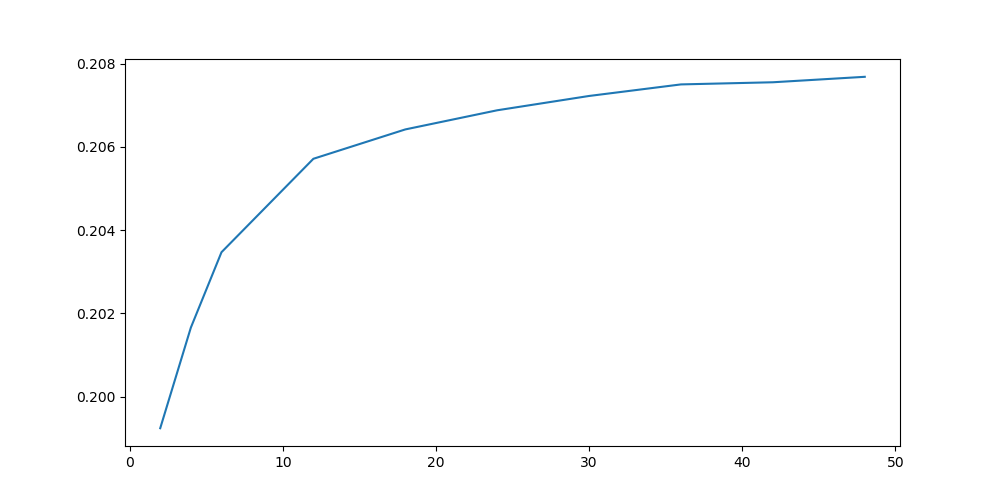

In [296]:
averageLoss = {}

for key in lossKeys:
    length = int(key[len('n_ei_candidates_'):])
    averageLoss[length] = numpy.mean([result[key] for result in results])


averageLoss
ax, fig = plt.subplots()
fig.plot(averageLoss.keys(), averageLoss.values())
fig

In [201]:
labels = [key for key in results[0].keys() if key not in nonFeatureKeys and key not in lossKeys]

bestSizes = [result['bestSize'] for result in results]

correlations = []
for label in labels:
    vector = [result[label] for result in results]
    correlation = scipy.stats.spearmanr(vector, bestSizes)[0]
    correlations.append({'name': label, 'correlation': correlation})

    
with open('correls.csv', 'wt') as file:
    writer = csv.DictWriter(file, fieldnames=['name','correlation'])
    writer.writeheader()
    writer.writerows(correlations)


correlations = list(sorted(correlations, key=lambda r:-abs(r['correlation'])))
pd.DataFrame(correlations)

/home/bradley/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


,correlation,name
0,-0.588810,log10_cardinality
1,0.481775,stdvsmin
2,0.479179,stdvsmedian
3,0.453743,std
4,-0.411603,best/median
5,0.312414,num_parameters
6,-0.184283,interactions
7,-0.173409,interactions_linear
8,0.138323,skew
9,-0.109955,interactions_peakvalley


In [216]:
def plot(variable, rounding, lim=None):
    pairs = [(float(round(result[variable]*(1/rounding))/(1/rounding)), float(result['bestSize'])) for result in results]
    pairs = sorted(pairs, key=lambda r:r[0])
    bestSizes = [p[1] for p in pairs]
    values = [p[0] for p in pairs]
    
    means = []
    meanValues = []
    allValues = set(values)
    for v in sorted(allValues):
        valueBestSizes = [bestSizes[i] for i in range(len(bestSizes)) if '{:.3E}'.format(values[i]) == '{:.3E}'.format(v)]
        meanValues.append(v)
        means.append(numpy.mean(valueBestSizes))
    
    ax, fig = plt.subplots()
    fig.set_xlabel(variable)
    fig.set_ylabel('n_EI_candidates')
    fig.set_xticks(numpy.linspace(numpy.min(values),numpy.max(values),10))
    fig.set_yticks(numpy.linspace(0,50,10))
    fig.set_ylim(0, 50)
    if lim:
        fig.set_xlim(0, lim)
    fig.xaxis.set_minor_formatter(mticker.ScalarFormatter())
    fig.xaxis.set_major_formatter(mticker.ScalarFormatter())
    fig.yaxis.set_minor_formatter(mticker.ScalarFormatter())
    fig.yaxis.set_major_formatter(mticker.ScalarFormatter())
    fig.scatter(values, bestSizes)
    fig.plot(meanValues, means, 'r')
    return fig

<IPython.core.display.Javascript object>


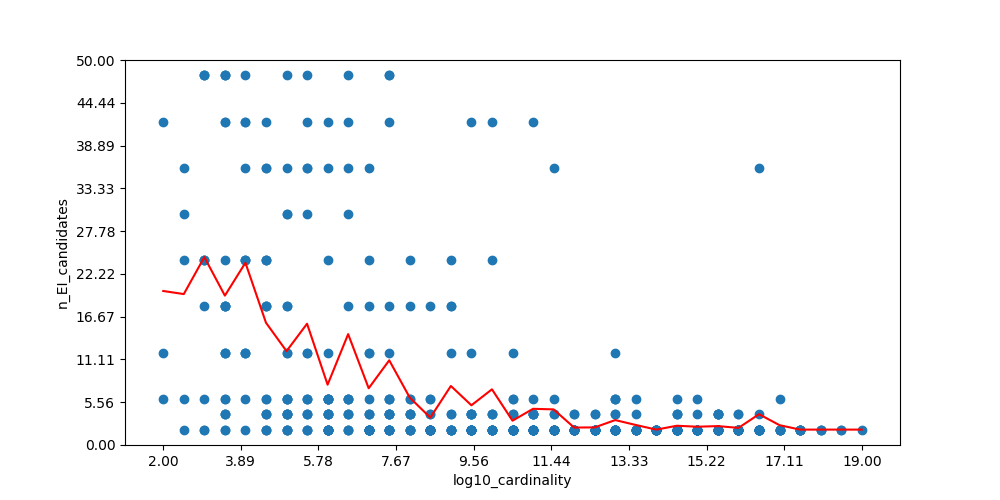

In [290]:
plot('log10_cardinality', 0.5)

<IPython.core.display.Javascript object>


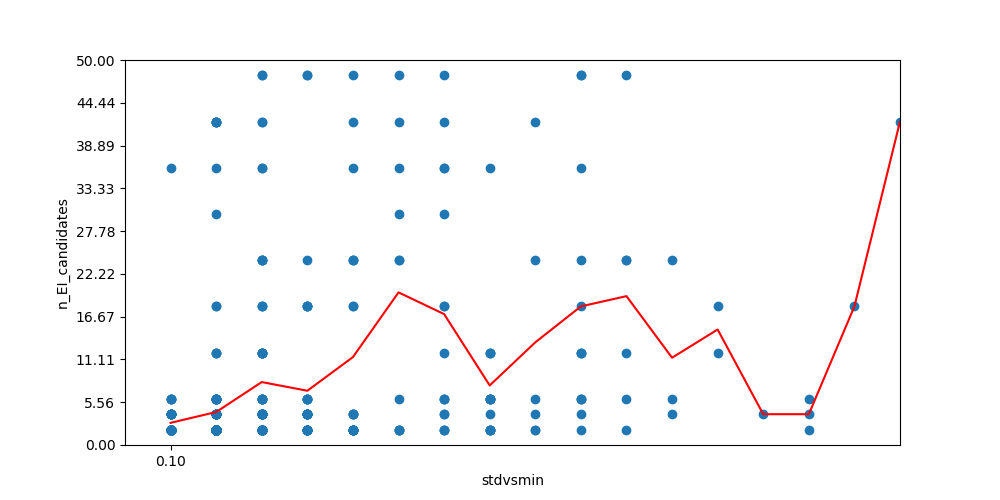

In [291]:
plot('stdvsmin', 0.1, 1.7)

<IPython.core.display.Javascript object>


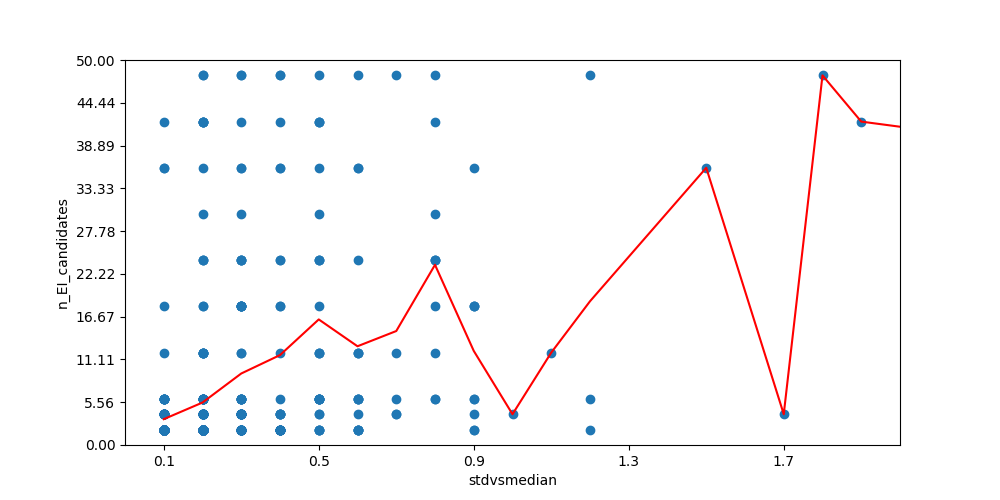

In [294]:
plot('stdvsmedian', 0.1, 2)

In [206]:
plot('std', 0.01, 0.15)

<IPython.core.display.Javascript object>

In [207]:
plot('skew', 0.3)

<IPython.core.display.Javascript object>

In [248]:
fields = sorted(results[0].keys())
fields = [field for field in fields if 'contributions' not in field and 'interactions' not in field and field not in lossKeys and field not in nonFeatureKeys]
vectors = [[float(result[f]) for f in fields] for result in features]
n_EI_candidates = [result['bestSize'] for result in results]
deviations = numpy.std(vectors, axis=0)
covarianceModel = sklearn.covariance.LedoitWolf()
covarianceModel.fit(numpy.array(vectors), numpy.array(n_EI_candidates))
deviations = numpy.std(vectors, axis=0)

rows = []
for i,l in enumerate(fields):
    data = {fields[k]:round(100*(covarianceModel.covariance_[i][k] / (deviations[i] * deviations[k]))) if k!= i else '' for k in range(len(fields))}
    data ['field'] = fields[i]
    rows.append(data)
pd.DataFrame(rows)

,best/median,field,kurtosis,log10_cardinality,num_parameters,range,skew,std,stdvsmedian,stdvsmin
0,,best/median,-2,55,58,45,-7,-60,-74,-68
1,-2,kurtosis,,-40,-41,-19,96,26,39,15
2,55,log10_cardinality,-40,,98,16,-48,-71,-57,-36
3,58,num_parameters,-41,98,,16,-48,-73,-59,-37
4,45,range,-19,16,16,,-16,18,-41,-42
5,-7,skew,96,-48,-48,-16,,37,46,21
6,-60,std,26,-71,-73,18,37,,56,28
7,-74,stdvsmedian,39,-57,-59,-41,46,56,,88
8,-68,stdvsmin,15,-36,-37,-42,21,28,88,


<IPython.core.display.Javascript object>


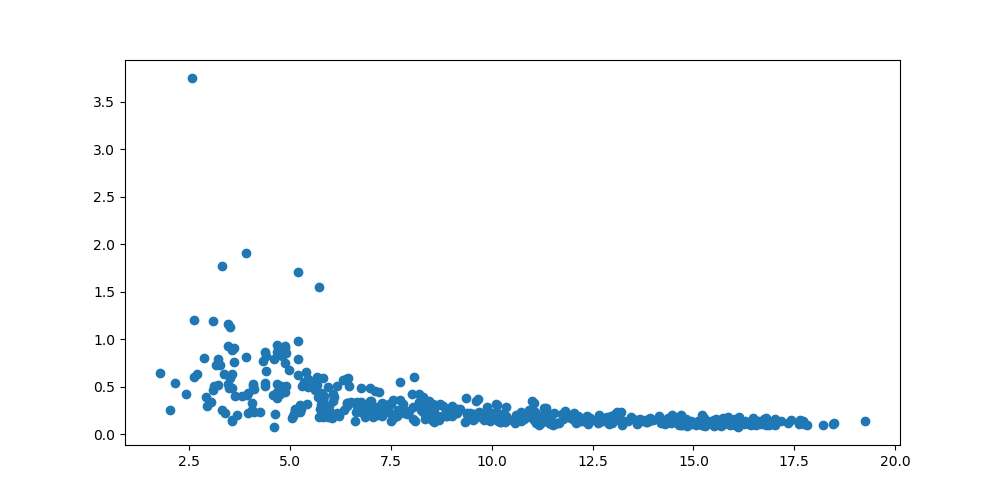

In [249]:
ax, fig = plt.subplots()
fig.scatter([result['log10_cardinality'] for result in results], [result['stdvsmedian'] for result in results])

<IPython.core.display.Javascript object>


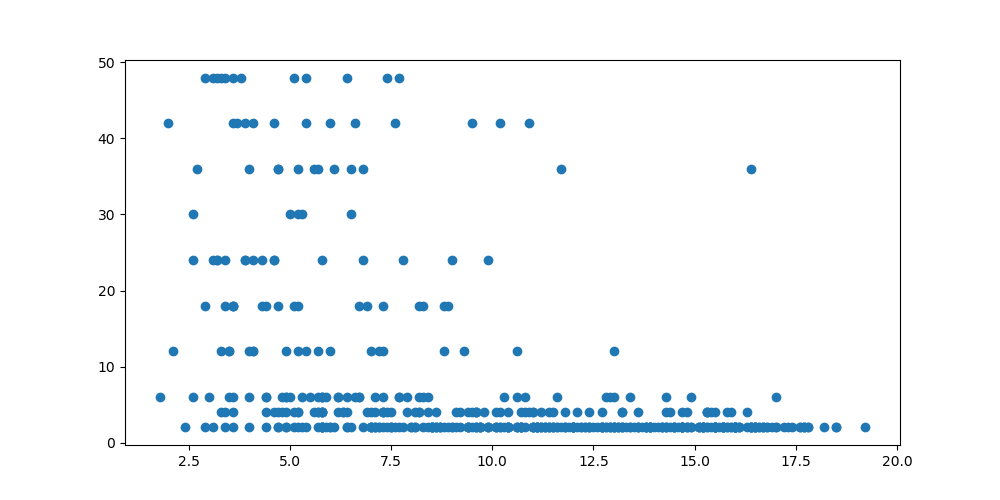

array([40.46060785, -0.09732084,  0.9459884 ])

In [282]:
predictors = ['log10_cardinality']

filteredResults = results

vectors = [[float(round(result[predictor]*10))/10 for predictor in predictors] for result in filteredResults]
n_EI_candidates = [result['bestSize'] for result in filteredResults]

def fit_function(x, a, b, c):
    log10_cardinality = x
    res= a*numpy.power(10, b*log10_cardinality)+c
    return res[:,0]


ax, fig = plt.subplots()
fig.scatter(vectors, n_EI_candidates)
fig

params = scipy.optimize.curve_fit(fit_function, vectors, n_EI_candidates, p0=(1, -1.0e-1, 3))[0]
params

In [283]:
def rp(number, precision=1):
    """ Rounds the given floating point number to a certain precision, for output."""
    return str(float(('{:.' + str(precision) + 'E}').format(number)))

equation = "n_EI_candidates = " + rp(params[2], 1)
equation += " + " + rp(params[0]) + " * 10 ^ (" + rp(params[1]) + " * log10_cardinality)"
print(equation)

n_EI_candidates = 0.95 + 40.0 * 10 ^ (-0.097 * log10_cardinality)


<IPython.core.display.Javascript object>


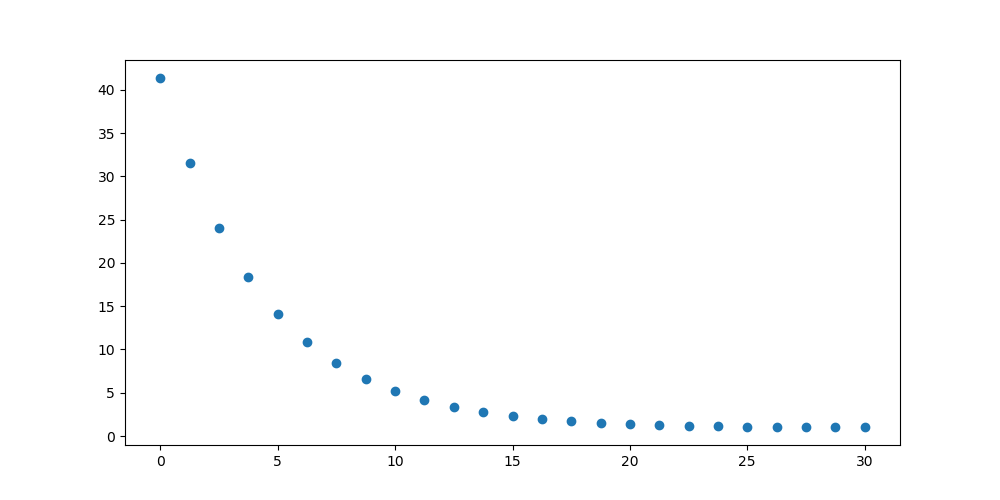

In [295]:
def predict(stdvsmedian):
    predicted = params[0] * math.pow(10,(params[1] * stdvsmedian)) + params[2]
    return predicted

    
values = numpy.linspace(0, 30, 25)
candidates = [predict(card) for card in values]

ax, nfig = plt.subplots()
nfig.scatter(values, candidates)
nfig